In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
img1=cv2.imread("dataset/m.jpg")

In [5]:
img2=cv2.imread("dataset/r1.jpg")

In [6]:
img3=cv2.imread("dataset/t2.jpg")

In [7]:
def plot_img(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

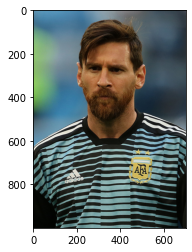

In [8]:
plot_img(img1)

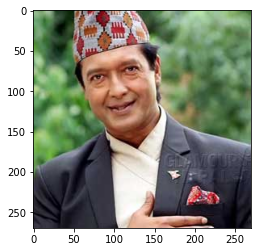

In [9]:
plot_img(img2)

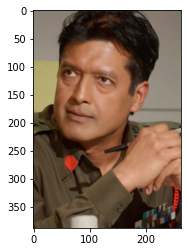

In [10]:
plot_img(img3)

In [11]:
def face_detection(img):
    faces = detect_face(img)
    print(faces)
    for bounding_box in faces:

        x = int(bounding_box[0])
        y = int(bounding_box[1])
        x2 = int(bounding_box[2])
        y2 = int(bounding_box[3])
        print(x,y,x2,y2)
        crop_face = img[y:y2,x:x2]
        crop_face = cv2.resize(crop_face,(160,160))
        return crop_face

In [12]:
face1 = face_detection(img1)

[[227.67 144.24 465.62 496.2 ]]
227 144 465 496


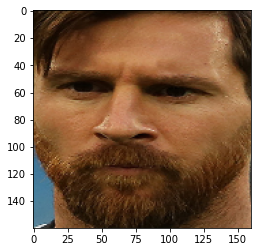

In [13]:
plot_img(face1)

In [14]:
face2 = face_detection(img2)

[[ 61.03  37.17 149.42 148.67]]
61 37 149 148


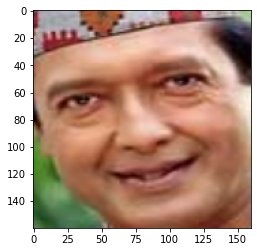

In [15]:
plot_img(face2)

In [16]:
embedder= FaceNet()

In [17]:
embeding1 = embedder.embeddings(np.expand_dims(face1,axis=0))
embeding1.shape

1/1 [==============================] - 2s 2s/step


(1, 512)

In [18]:
embeding2 = embedder.embeddings(np.expand_dims(face2,axis=0))
embeding2.shape

1/1 [==============================] - 0s 59ms/step


(1, 512)

In [19]:
similarity_score=cosine_similarity(embeding1,embeding2)

In [20]:
similarity_score

array([[-0.34592438]], dtype=float32)

In [21]:
embeding3 = embedder.embeddings(np.expand_dims(face_detection(img3),axis=0))
embeding3.shape

[[ 41.51  44.51 174.93 231.3 ]]
41 44 174 231
1/1 [==============================] - 0s 57ms/step


(1, 512)

In [22]:
similarity_score=cosine_similarity(embeding2,embeding3)

In [23]:
similarity_score

array([[0.796756]], dtype=float32)